In [69]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [73]:
iris = load_iris()
df = pd.DataFrame(data = np.c_[iris["data"], iris["target"]],
                  columns= iris['feature_names'] + ['target'] )

df2 = df["target"].replace({0:"setosa",
                            1:"versicolor",
                            2:"virginica"})
X = df.drop("target",axis=1).values
y = df["target"].values
df

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [6]:
df_target = pd.concat([df.iloc[:,:4],df2],axis=1)
df_target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


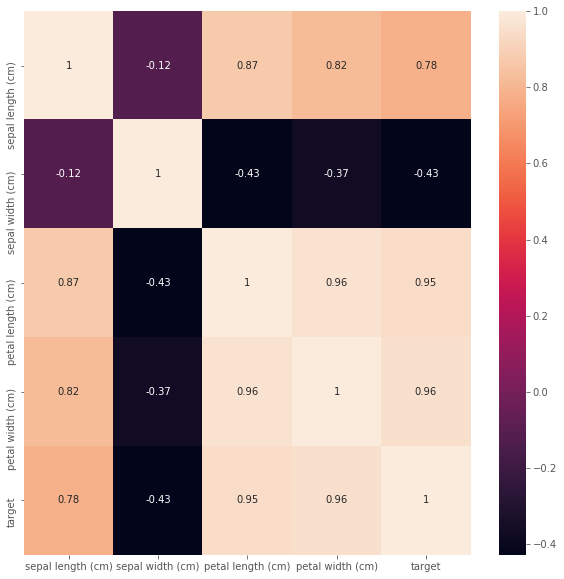

In [7]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True )
plt.show()

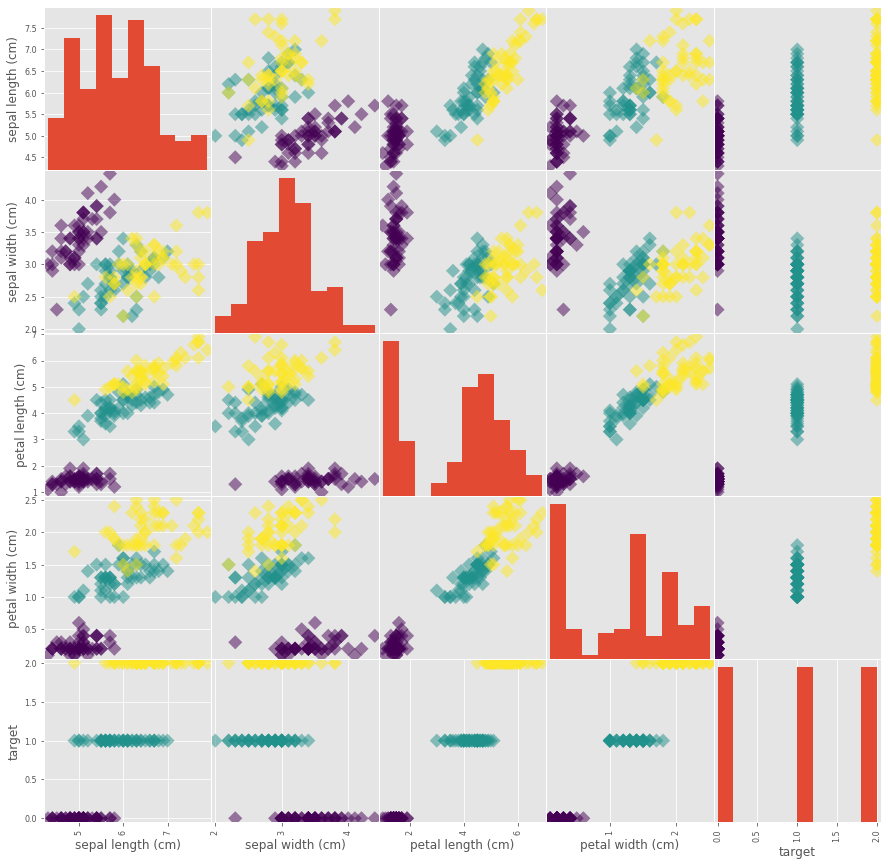

In [8]:
_=pd.plotting.scatter_matrix(df,c=y,figsize=(15,15), s =100 ,marker="D",grid = True)
plt.show()

In [9]:
df_target.groupby("target").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


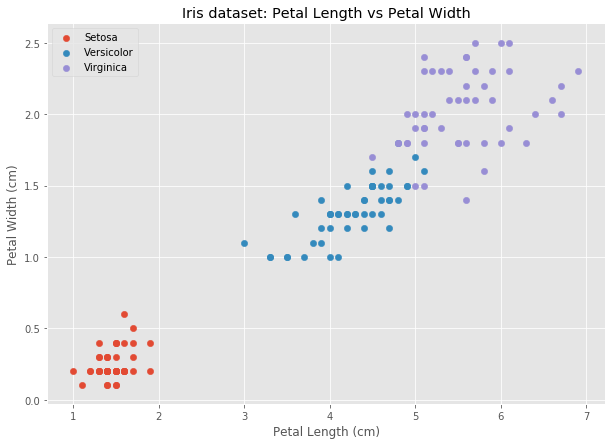

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(x=df[df["target"]==0]["petal length (cm)"],y=df[df["target"]==0]["petal width (cm)"],
            label="Setosa" , s=40)
plt.scatter(x=df[df["target"]==1]["petal length (cm)"],y=df[df["target"]==1]["petal width (cm)"],
            label="Versicolor", s=40)
plt.scatter(x=df[df["target"]==2]["petal length (cm)"],y=df[df["target"]==2]["petal width (cm)"],
            label="Virginica", s=40)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title('Iris dataset: Petal Length vs Petal Width')
plt.legend(loc="upper left")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors = 3)
X_knn = df[["petal length (cm)", "petal width (cm)"]].values
y_knn = df["target"].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True, stratify=y )


In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
knn.score(X_test,y_test)

0.9555555555555556

In [17]:
knn2 = KNeighborsClassifier(n_neighbors = 5)

cv_score = cross_val_score(knn2, X, y, cv=5)
cv_score

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [18]:
y_pred = knn.predict(X_test)
y_pred

array([2., 1., 1., 1., 2., 2., 1., 1., 0., 2., 0., 0., 2., 2., 0., 2., 1.,
       0., 0., 0., 1., 0., 1., 2., 2., 1., 1., 1., 1., 0., 2., 2., 1., 0.,
       2., 0., 0., 0., 0., 1., 1., 0., 1., 2., 1.])

In [29]:
y_pred_proba = knn.predict_proba(X_test)
y_pred_proba

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.

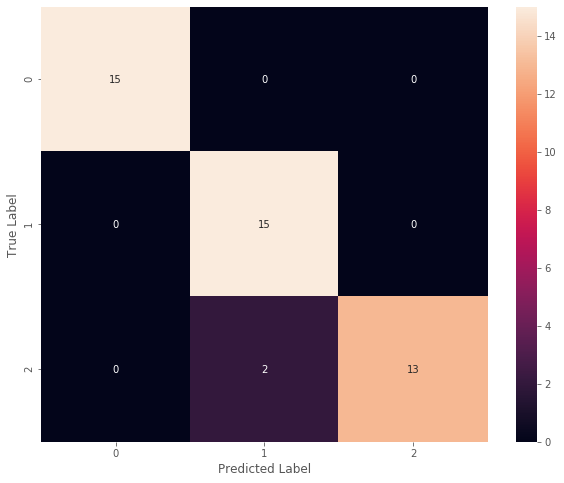

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True )
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [21]:
alpha_space = np.logspace(-4, 0, 50)
alpha_space

array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3.55648031e-03,
       4.29193426e-03, 5.17947468e-03, 6.25055193e-03, 7.54312006e-03,
       9.10298178e-03, 1.09854114e-02, 1.32571137e-02, 1.59985872e-02,
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00])

<Figure size 720x576 with 0 Axes>

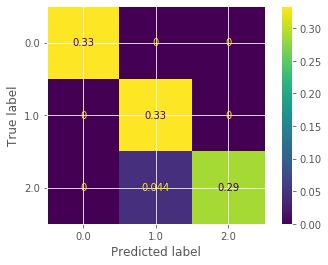

In [22]:
plt.figure(figsize=(10,8))
plot_confusion_matrix(knn, X_test, y_test, normalize = "all")



In [27]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00        15\n         1.0       0.88      1.00      0.94        15\n         2.0       1.00      0.87      0.93        15\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.96        45\nweighted avg       0.96      0.96      0.96        45\n'

In [56]:
knn2 = KNeighborsClassifier()
params = {"n_neighbors" : np.arange(1,10,1)}

In [57]:
clf = GridSearchCV(knn2, params, cv = 5)

In [58]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
clf.best_score_

0.980952380952381

In [60]:
clf.best_params_

{'n_neighbors': 9}

In [65]:
y_pred = clf.predict(X_test)
y_pred

array([2., 1., 1., 1., 2., 2., 1., 1., 0., 2., 0., 0., 2., 2., 0., 2., 1.,
       0., 0., 0., 1., 0., 1., 2., 2., 1., 1., 1., 1., 0., 2., 2., 1., 0.,
       2., 0., 0., 0., 0., 1., 1., 0., 1., 2., 1.])

In [68]:
clf.score(X_test, y_test)

0.9555555555555556

array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])